https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

medical = pd.read_csv('/content/drive/MyDrive/Medical cost/insurance.csv')

In [ ]:
# 정보들이 어떤것들이 있는지
medical.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# 크키가 얼마나 되는지
# 1338개
medical.shape

(1338, 7)

In [ ]:
# 상위 5개 정보
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# 하위 5개 정보
medical.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
# 결측치 확인 NaN
medical.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# 결측치 확인 Null
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# 어떤 정보들이 있는지.
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# object 변환을 위해 복사본 만들기
medical_ch = medical.copy()

In [ ]:
# object 변환 함수
def Medical_Object_Change(dict, name):
  medical_ch[name] = medical_ch[name].map(dict)

In [ ]:
# 담배 변환
Smoker_Change = {
    'yes' : 1,
    'no' : 0
}
Medical_Object_Change(Smoker_Change, 'smoker')

In [ ]:
# 지역 변환
Region_Change = {
    'northeast' : 0,
    'southeast' : 1,
    'southwest' : 2,
    'northwest' : 3
}
Medical_Object_Change(Region_Change, 'region')

In [ ]:
# 성별 변환
Sex_Change = {
    'male' : 0,
    'female' : 1
}
Medical_Object_Change(Sex_Change, 'sex')

In [ ]:
medical_ch.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.486547,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104915,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


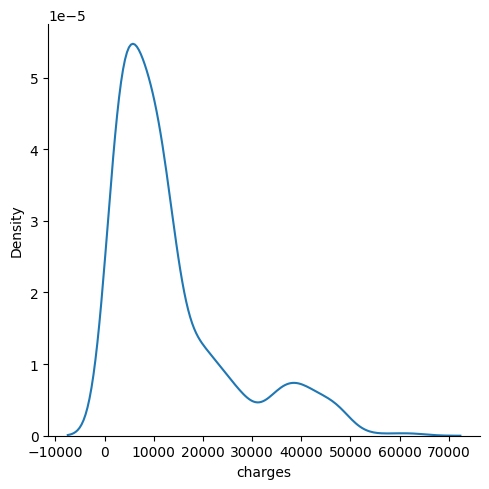

In [ ]:
sns.displot(medical, x="charges",kind="kde") 

In [ ]:
# 관계성 알아보기
corr = medical_ch.corr()
corr.shape

(7, 7)

<Axes: >

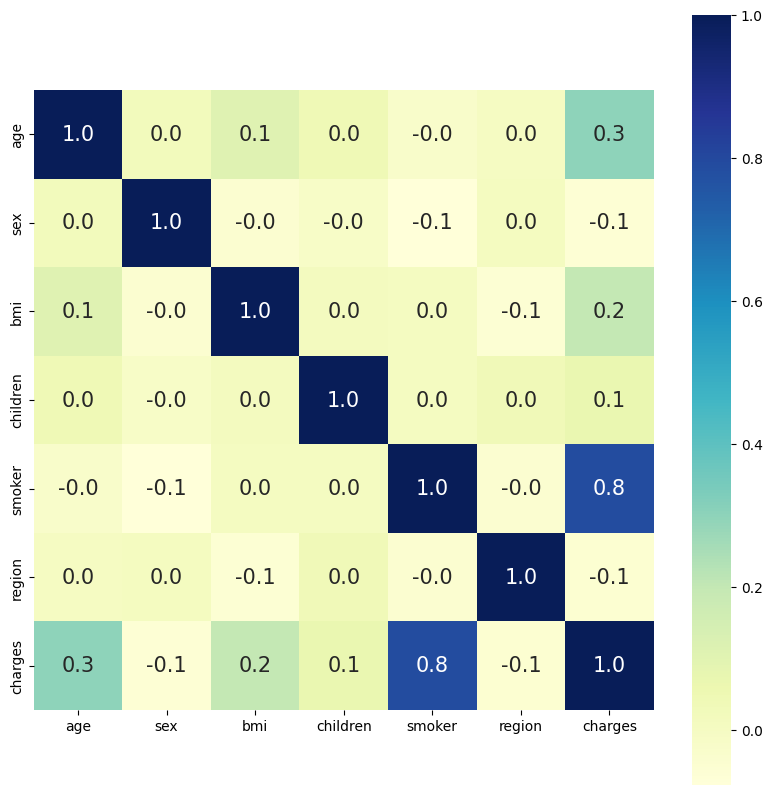

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu')

In [ ]:
def Regplot_Func(x, y='charges', data = medical_ch):
  sns.regplot(
    x = x,
    y = y,
    data = data,
    scatter_kws={"color": "g"},
    line_kws={"color": "red"}
  )

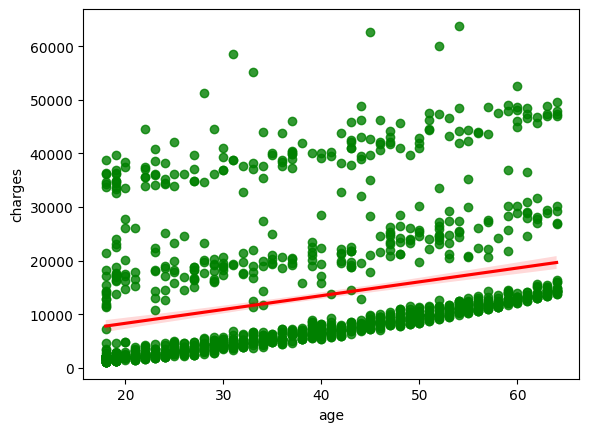

In [ ]:
# 나이에 따라서 보혐료가 영향이 있는지
Regplot_Func('age')

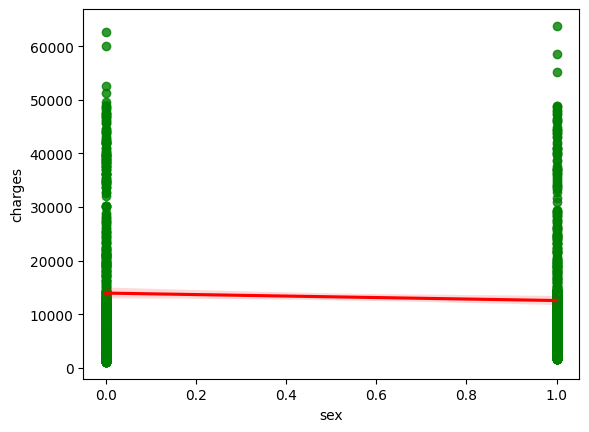

In [ ]:
Regplot_Func('sex')

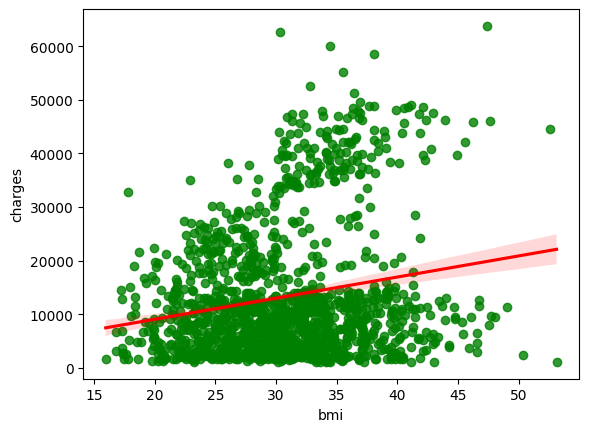

In [ ]:
Regplot_Func('bmi')

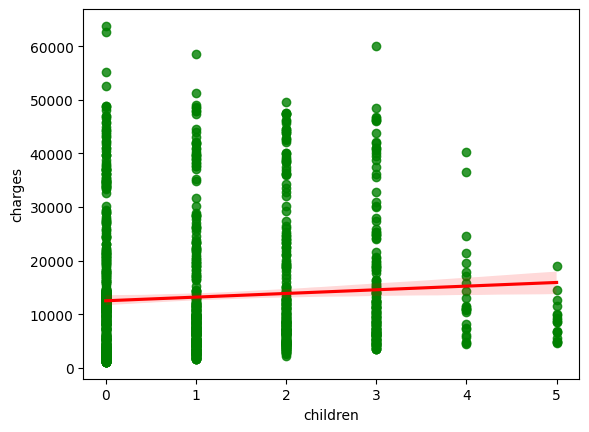

In [ ]:
Regplot_Func('children')

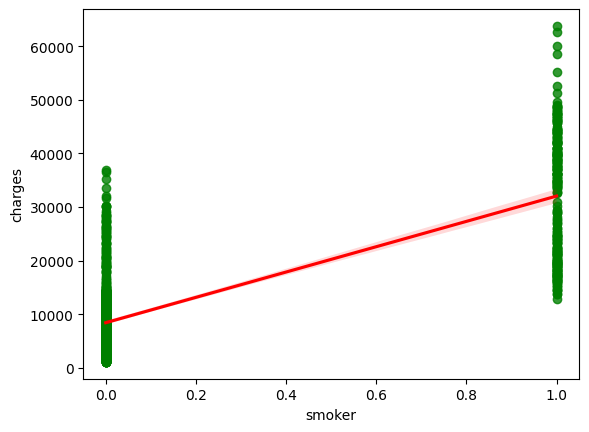

In [ ]:
Regplot_Func('smoker')

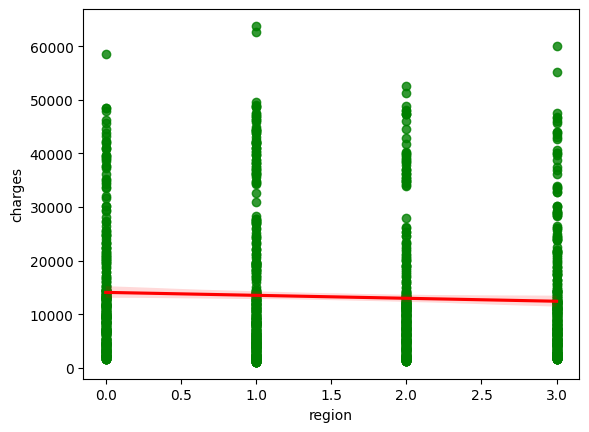

In [ ]:
Regplot_Func('region')

## 보험 비용 예측 가설
 - 나이가 요금에 영향을 주는가?
   - 나이에 따라서 최소 가격이 오르긴 하나 큰 편차는 없다.
 - 성별이 요금에 영향을 주는가?
   - 없다.
 - BMI에 따라서 요금에 영향을 주는가?
   - 어느정도 있는거 같다.
 - 영향을 준다면, 이상적비율에서 벗어나는가?
   - 어느정도??
 - 자녀 분양수에 따라서 요금에 영향을 주는가?
   - 없다.
 - 흡연자에 따라서 요금에 영향을 주는가?
   - 영향이 있다.
 - 지역에 따라서 요금에 영향을 주는가?
   - 없다.



   -----------
   - 지역 별 가격
   - 인원 별 할인

In [ ]:
# 비교에 따라서 이상치가 너무나도 큰 편차가 존재한다.
# 이상치 처리
#medical_features_name = {'age', 'sex', 'bmi', 'children', 'smoker', 'region'}

Q1 = np.percentile(medical_ch['charges'], 25)
Q3 = np.percentile(medical_ch['charges'], 75)
print(f"Q1 : {Q1}, Q3 : {Q3}")

charges_IQR = Q3 - Q1
medical_IQR = medical_ch[
    (medical_ch['charges'] >= Q1 - 1.5 * charges_IQR) &
    (medical_ch['charges'] >= Q3 + 1.5 * charges_IQR)
]

Q1 : 4740.28715, Q3 : 16639.912515


<Axes: >

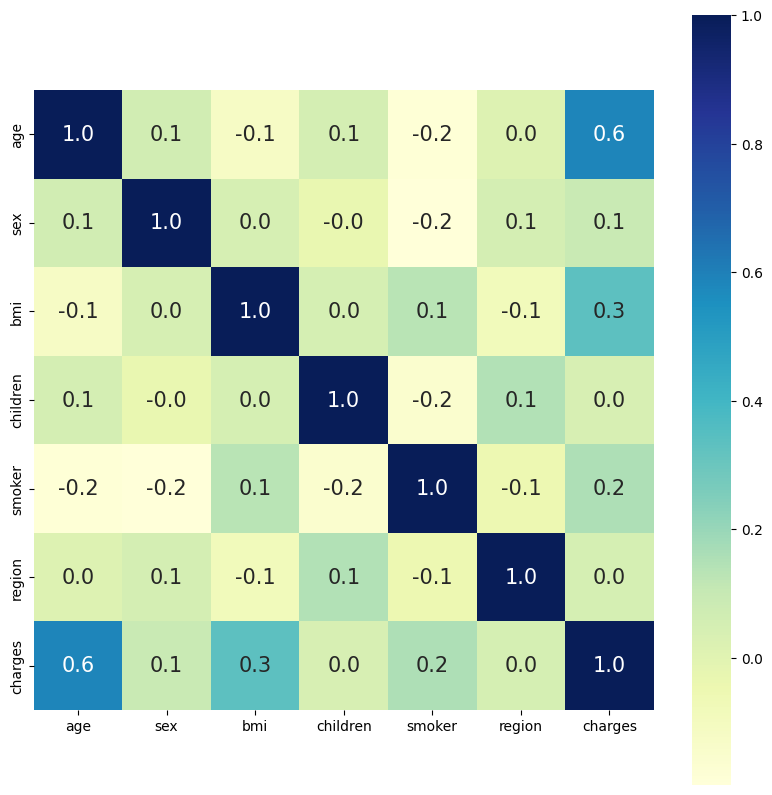

In [ ]:
corr = medical_IQR.corr()

plt.figure(figsize=(10,10))# 관계성 알아보기
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu')

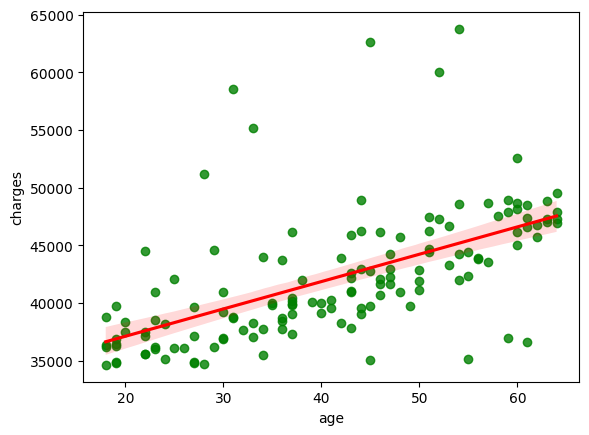

In [ ]:
Regplot_Func('age', data=medical_IQR)

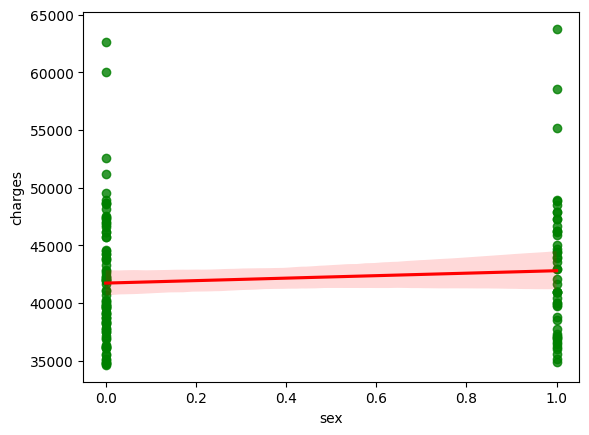

In [ ]:
Regplot_Func('sex', data=medical_IQR)

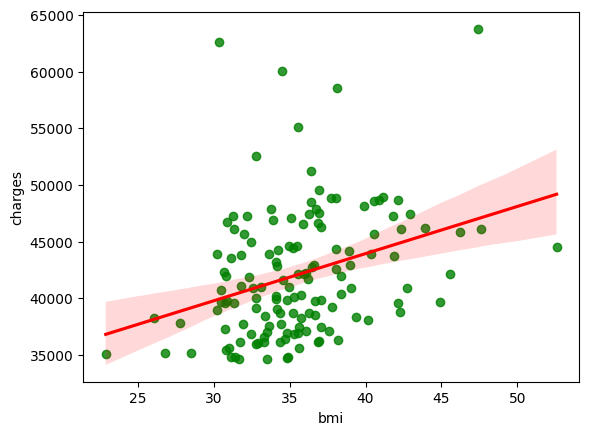

In [ ]:
Regplot_Func('bmi', data=medical_IQR)

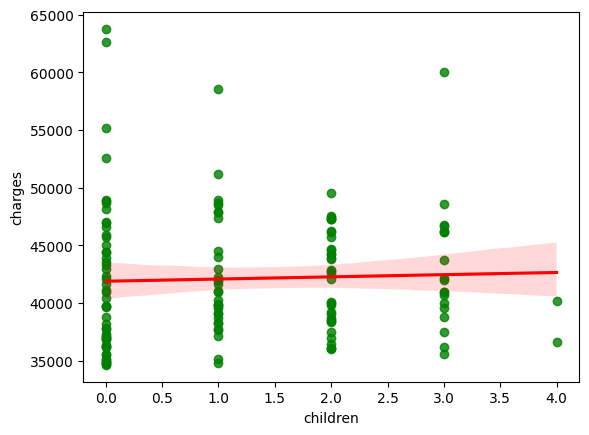

In [ ]:
Regplot_Func('children', data=medical_IQR)

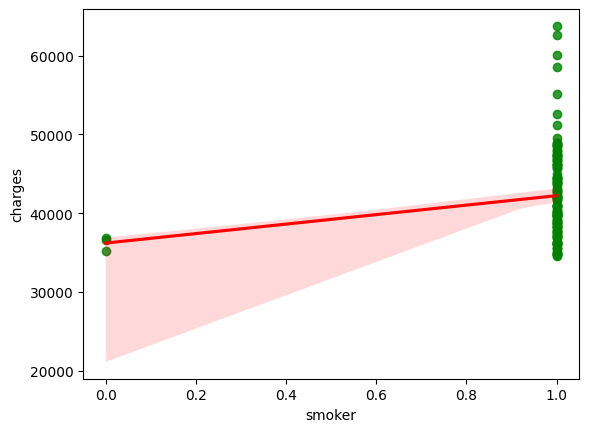

In [ ]:
Regplot_Func('smoker', data = medical_IQR)

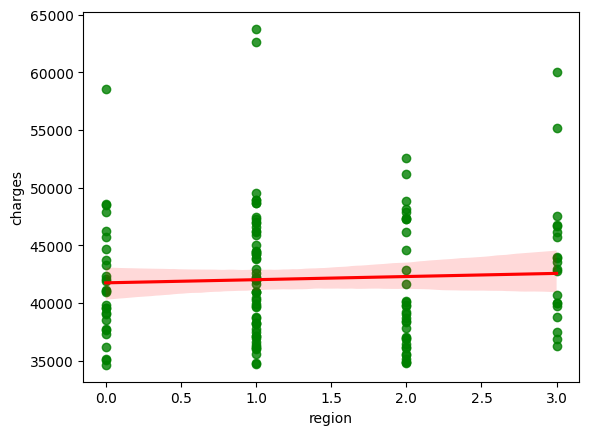

In [ ]:
Regplot_Func('region', data = medical_IQR)

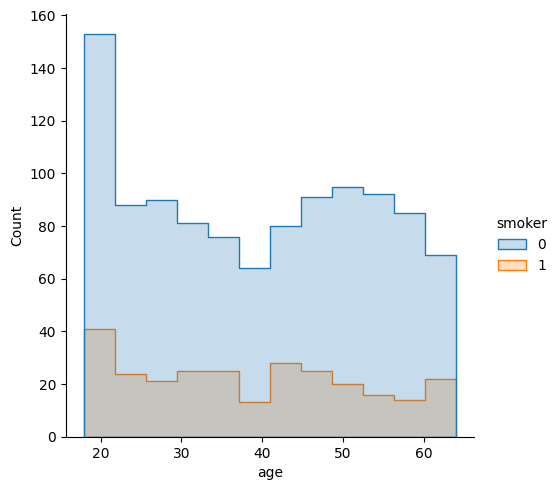

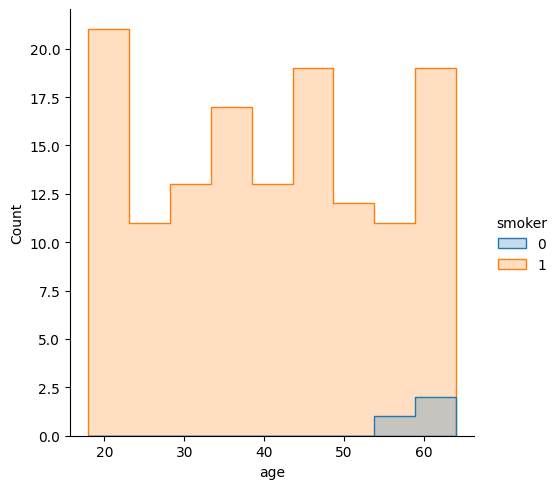

In [ ]:
# 담배피는 사람들의 관계가 올라갔다.
# 담배를 피는 사람들은 어떤 사람들인가?
sns.displot(
    x = 'age',
    hue = 'smoker',
    element='step',
    data = medical_ch,
)
sns.displot(
    x = 'age',
    hue = 'smoker',
    element='step',
    data = medical_IQR,
)

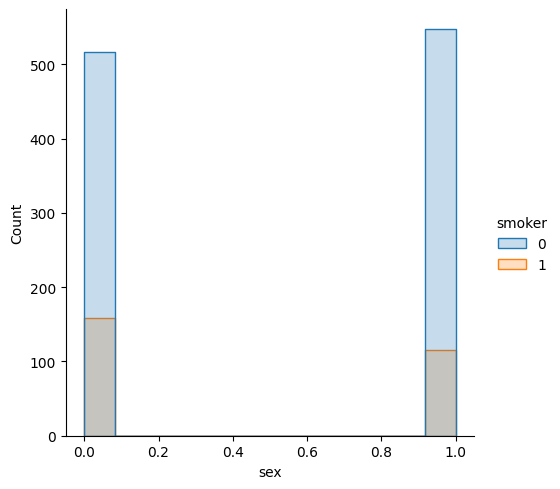

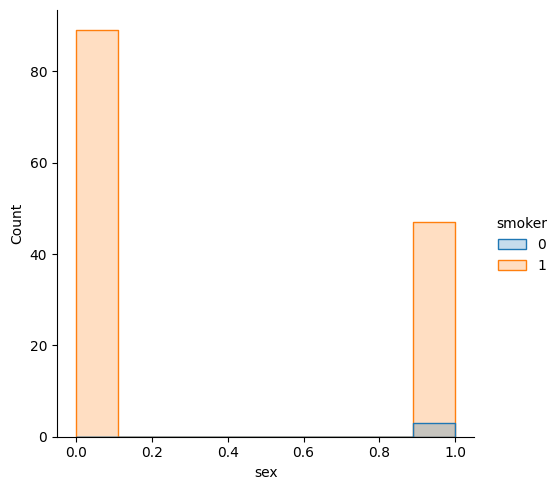

In [ ]:
sns.displot(
    x = 'sex',
    hue = 'smoker',
    element='step',
    data = medical_ch,
)
sns.displot(
    x = 'sex',
    hue = 'smoker',
    element='step',
    data = medical_IQR,
)

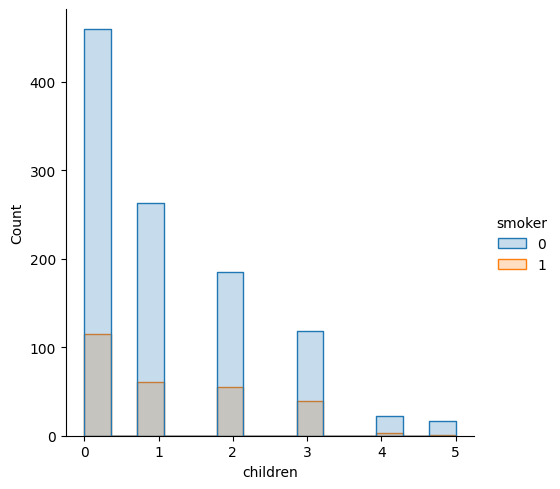

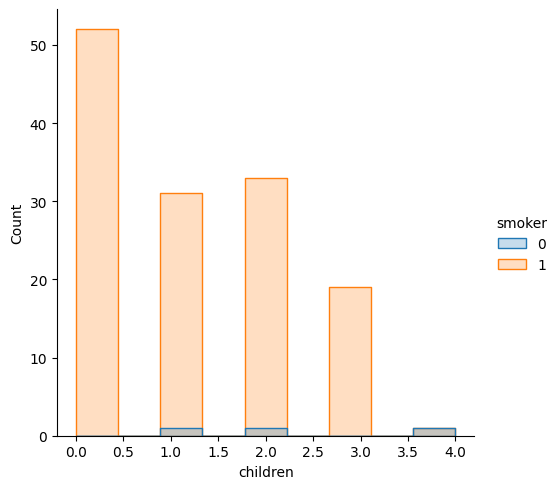

In [ ]:
sns.displot(
    x = 'children',
    hue = 'smoker',
    element='step',
    data = medical_ch,
)
sns.displot(
    x = 'children',
    hue = 'smoker',
    element='step',
    data = medical_IQR,
)

## 이상치 처리 후 보험 비용 예측 가설
 - 나이가 요금에 영향을 주는가?
  - True
 - 성별이 요금에 영향을 주는가?
  - False
 - BMI에 따라서 요금에 영향을 주는가?
   - True
 - 자녀 분양수에 따라서 요금에 영향을 주는가?
  - False
 - 흡연자에 따라서 요금에 영향을 주는가?
    - True
 - 지역에 따라서 요금에 영향을 주는가?
  - False

In [ ]:
# 연관성이 없는 정보 삭제..?
medical_DF = medical_ch
medical_DF

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


In [ ]:
medical_data = medical_DF.drop('charges', axis = 1)
medical_target = medical_DF['charges']

In [ ]:
# 있는 정보를 토대로 예측해보자.
# ?? 맞는지 모름
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   medical_data,
   medical_target,
   test_size = 0.2,
   random_state = 20
)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# 알고리즘이 예측한 값과 실제 정답과의 차이를 의미한다.
# MAE : 실제 값과 예측 값의 차이
# MSE : 실제값과 예측값 차이를 제곱해 평균화
# RMSE : MSE 루트값

y_preds = lr.predict(X_train)

In [ ]:
mse = mean_squared_error(y_train, y_preds)
mae = mean_absolute_error(y_train, y_preds)
rmse = np.sqrt(mean_squared_error(y_train, y_preds))
r2 = r2_score(y_train, y_preds)

print(f"MSE : {mse : 0.2f}, RMSE : {rmse : 0.3f}, MAE : {mae : 0.3f}")
print(f"예측 R2 값 : {r2: 0.3f}\n")

MSE :  38172128.44, RMSE :  6178.360, MAE :  4268.773
예측 R2 값 :  0.738



In [ ]:
y_preds = lr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
r2 = r2_score(y_test, y_preds)

print(f"MSE : {mse : 0.2f}, RMSE : {rmse : 0.3f}, MAE : {mae : 0.3f}")
print(f"예측 R2 값 : {r2: 0.3f}")

MSE :  30853018.77, RMSE :  5554.549, MAE :  4032.182
예측 R2 값 :  0.795
